Daftar Isi
 - Pendahuluan
 - Pra-pemrosesan Data
 - Analisa Data Eksploratif (EDA)
     - Histogram dan Distribusi Fitur
     - Matriks Korelasi
 - Membangun Model Untuk Memprediksi Churn Pengguna
     - Regresi Logistik
     - Random Forest
     - Accurasy, Precision dan Recall
 - Membuat Klaster Pengguna
     - Grafik Dendogram
     - K-means
     - Grafik Distribusi Fitur
     - Churn Rate Setiap Klaster
     - Kesimpulan dan Rekomendasi

# Pendahuluan
Sebelum memulai project, berikut pendahuluan dan sedikit informasi mengenai apa yang akan dilakukan.


# Menganalisa Churn Rate Tempat Gym "Model Fitness"

Waralaba pusat kebugaran bernama Model Fitness sedang mengembangkan strategi keterlibatan pelanggan berdasarkan data analitik.

Salah satu masalah yang paling sering dijumpai oleh layanan pusat kebugaran dan bahkan layanan lainnya adalah perputaran pelanggan atau customer churn. Bagaimana cara Anda mengetahui bahwa pelanggan sudah berhenti menggunakan layanan Anda? Anda memang bisa menghitung tingkat churn berdasarkan jumlah orang yang menghapus akun atau tidak memperbarui kontrak langganan mereka. Namun terkadang, Anda tidak bisa mengetahui dengan pasti apakah seorang klien benar-benar telah berhenti: mereka mungkin meninggalkan Anda tanpa sepengetahuan Anda.

Biasanya, jika seorang pelanggan memutuskan untuk bergabung, kemudian datang beberapa kali lalu menghilang, kemungkinan besar mereka tidak akan kembali lagi.
Untuk mengurangi tingkat churn, Model Fitness telah melakukan digitalisasi terhadap sejumlah profil pelanggannya. Adapun pada tugas kali ini tujuannya adalah menganalisis profil para pelanggan tersebut dan mengembangkan strategi retensi pelanggan (customer retention).

## Pra-pemrosesan Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Model Fitness menyediakan kepada Anda file CSV yang berisi data tingkat churn pelanggan untuk bulan tertentu dan informasi tentang bulan sebelumnya. Dataset ini mencakup kolom-kolom berikut:

- 'Churn' — churn aktual untuk bulan terkait
- Kolom dataset saat ini:
  Data pengguna untuk bulan sebelumnya
  - 'gender'
  - 'Near_Location' — apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran
  - 'Partner' — apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka)
  - Promo_friends — apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka)
  - 'Phone' — apakah pengguna memberikan nomor telepon mereka
  - 'Age'
  - 'Lifetime' — waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran

  Data dari log kunjungan dan pembelian serta data terkait status keanggotaan saat ini
    - 'Contract_period' — 1 bulan, 3 bulan, 6 bulan, atau 1 tahun
    - 'Month_to_end_contract' — sisa bulan sebelum kontrak berakhir
    - 'Group_visits' — apakah pengguna mengambil bagian dalam sesi kelompok
    - 'Avg_class_frequency_total' — frekuensi rata-rata kunjungan per minggu selama masa hidup pelanggan
    - 'Avg_class_frequency_current_month' — frekuensi rata-rata kunjungan per minggu selama bulan sebelumnya
    - 'Avg_additional_charges_total' — jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


## Analisa Data Eksploratif

In [3]:
# menampilkan informasi umum data
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Tidak ada nilai yang hilang dari data ini.

In [4]:
# melihat mean value dan standar deviasi
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
# menghilangkan nol dan mengubah tipe data
gym['Month_to_end_contract'] = gym['Month_to_end_contract'].astype(np.int64)

In [6]:
# melihat nilai fitur rata-ratanya dalam dua kelompok, yaitu untuk mereka yang keluar (churn) dan untuk mereka yang tinggal
gym.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Histogram

Text(0, 0.5, 'distribution')

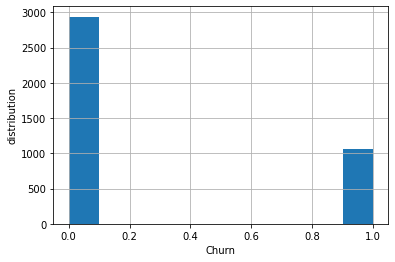

In [7]:
# membuat histogram berdasarkan churn
gym['Churn'].hist()
plt.xlabel('Churn')
plt.ylabel('distribution')

Ada lebih banyak pelanggan yang tidak kembali lagi ke tempat gym. Jumlahnya kira-kira 2x lipat banyak dibandingkan pelanggan yang tetap tinggal.

### Matriks Korelasi

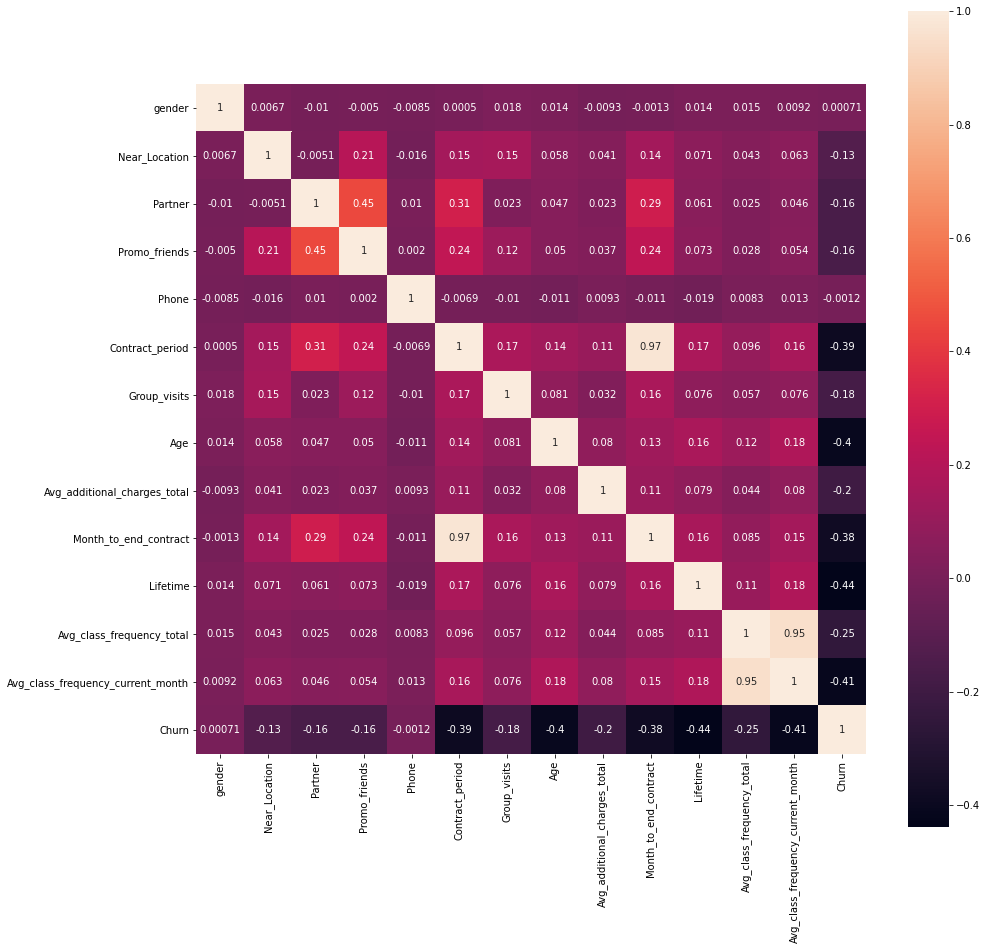

In [8]:
# membuat matriks korelasi
corr_m = gym.corr()

# membuat heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_m, square=True, annot=True)
plt.show()

## Tahap Membangun Model untuk Memprediksi Churn Pengguna

Buat model klasifikasi biner untuk pelanggan di mana fitur targetnya adalah pengguna yang akan keluar bulan depan.

In [9]:
# membagi data menjadi fitur (matriks X) dan variabel target (y)
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

# membagi data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Regresi Logistik
Pertama kita akan melatih model denngan regresi logistik terlebih dulu.

In [10]:
# menentukan algoritme model 
model = LogisticRegression()

# melatih model
model.fit(X_train, y_train)

# gunakan model terlatih untuk membuat prediksi
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

In [11]:
# menampilkan metrik untuk prediksi yang dihasilkan
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.87
Recall: 0.81


### Random Forest
Selanjutnya kita menggunakan algoritme random forest.

In [12]:
# tentukan algoritme untuk model random forest yang baru
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# latih model random forest
rf_model.fit(X_train, y_train)

# gunakan model terlatih untuk membuat prediksi
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

In [13]:
# menampilkan metrik untuk prediksi yang dihasilkan
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82


**Dari hasil tingkat accuracy, precision dan recall, model regresi logistik memberikan hasil yang lebih baik.** Walaupun selisih tingkat recall pada model random forest lebih tinggi, namun untuk tingkat accuracy dan precision model regresi logistik lebih unggul.

## Membangun Cluster Pengguna

In [14]:
# melakukan standardisasi data
sc = StandardScaler()
X_sc = sc.fit_transform(gym)

In [15]:
# membuat matriks jarak
linked = linkage(X_sc, method = 'ward')

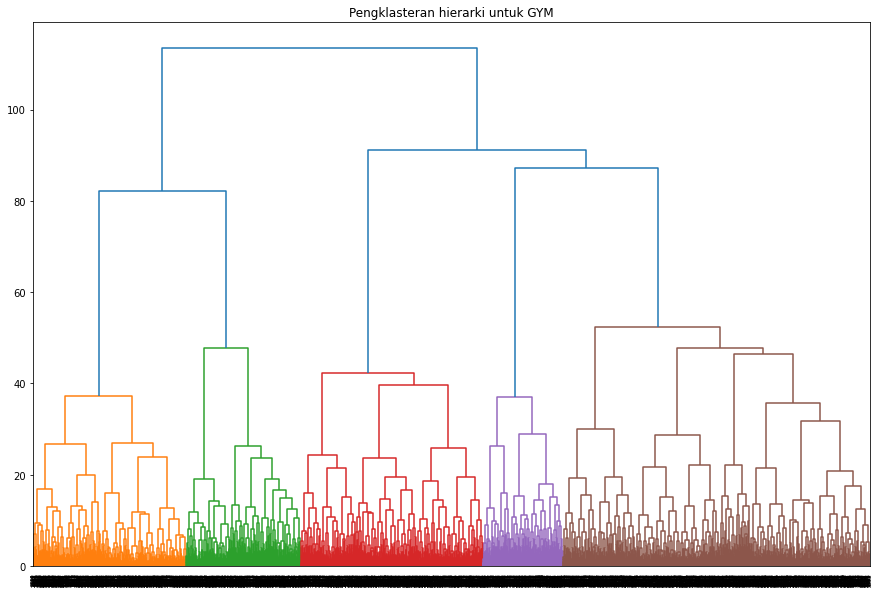

In [16]:
# membuat dendogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Pengklasteran hierarki untuk GYM')
plt.show() 

In [17]:
# menetapkan jumlah klasternya menjadi 5
km = KMeans(n_clusters = 5)

# menerapkan algoritme pada data dan buat vektor klaster
labels = km.fit_predict(X_sc)

In [18]:
# menyimpan label klaster di kolom dataset
gym['cluster_km'] = labels

In [19]:
# mendapatkan statistik nilai fitur rata-rata per klaster
mean_feature = gym.groupby(['cluster_km']).mean()
mean_feature

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.503106,0.938923,0.768116,0.564182,1.000000,11.173913,0.557971,29.899586,161.514913,10.223602,4.704969,2.006679,2.001081,0.015528
1,0.507447,0.760638,0.341489,0.179787,0.997872,1.567021,0.257447,26.908511,115.109065,1.513830,0.976596,1.448700,1.026250,0.997872
2,0.476301,0.825434,0.447399,0.253179,1.000000,2.647399,0.381503,30.017341,153.490037,2.464740,4.669364,1.183720,1.182760,0.001156
3,0.524804,0.866841,0.469974,0.308094,0.000000,4.806789,0.428198,29.331593,144.156967,4.493473,3.945170,1.855107,1.723740,0.263708
4,0.549645,0.842790,0.374704,0.216312,0.998818,2.750591,0.442080,29.977541,160.245842,2.528369,4.593381,2.933126,2.939963,0.007092


Semua nilai rata-rata fitur memiliki selisih yang sedikit satu dengan yang lainnya. Untuk fitur "Month_to_end_contract" memiliki selisih agak jauh karena perbedaan sisa bulan antara 1 hingga 12 bulan.

<AxesSubplot:xlabel='cluster_km', ylabel='Avg_additional_charges_total'>

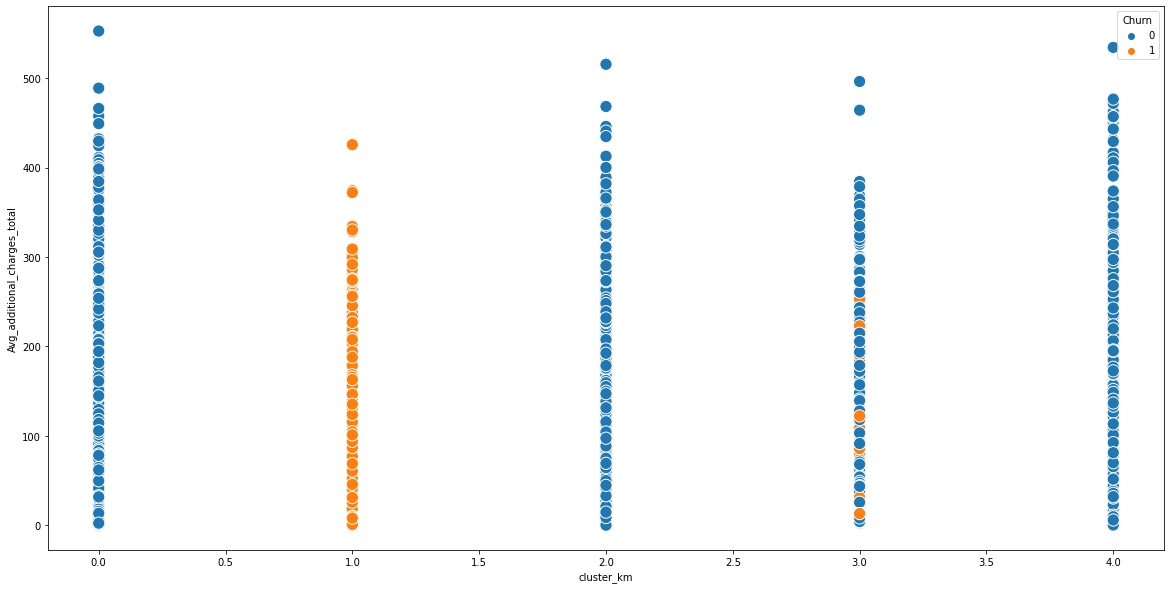

In [20]:
# membuat grafik distribusi fitur untuk setiap klasternya
plt.figure(figsize=(20,10))
sns.scatterplot(data=gym, x='cluster_km', y='Avg_additional_charges_total', hue='Churn', s=150)

<AxesSubplot:xlabel='cluster_km', ylabel='Month_to_end_contract'>

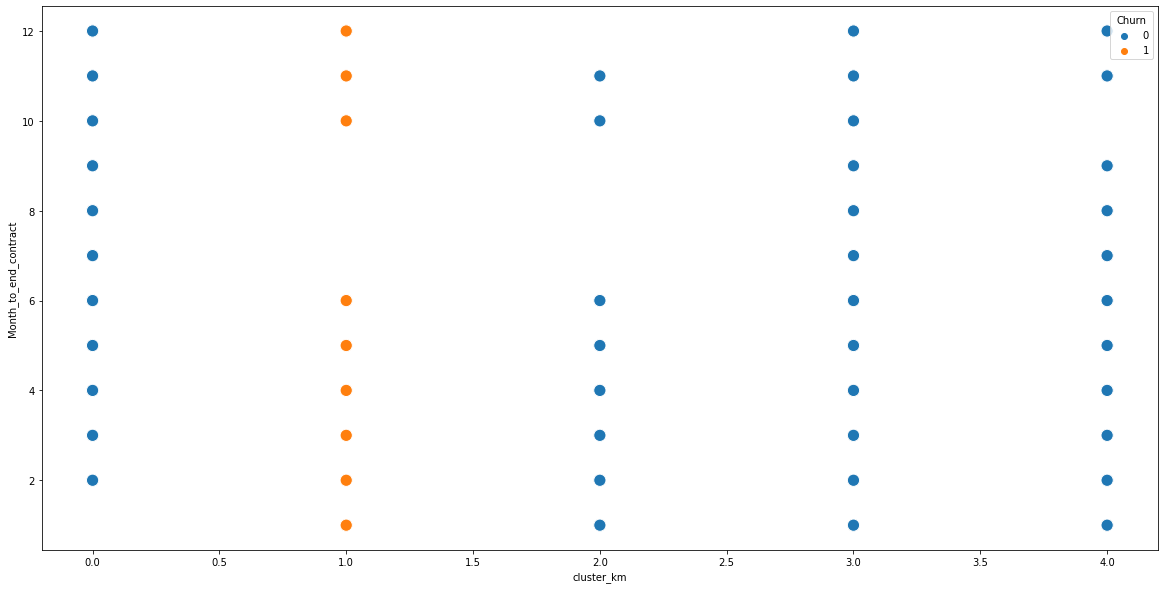

In [21]:
# membuat grafik distribusi fitur untuk setiap klasternya
plt.figure(figsize=(20,10))
sns.scatterplot(data=gym, x='cluster_km', y='Month_to_end_contract', hue='Churn', s=150)

<AxesSubplot:xlabel='cluster_km', ylabel='Lifetime'>

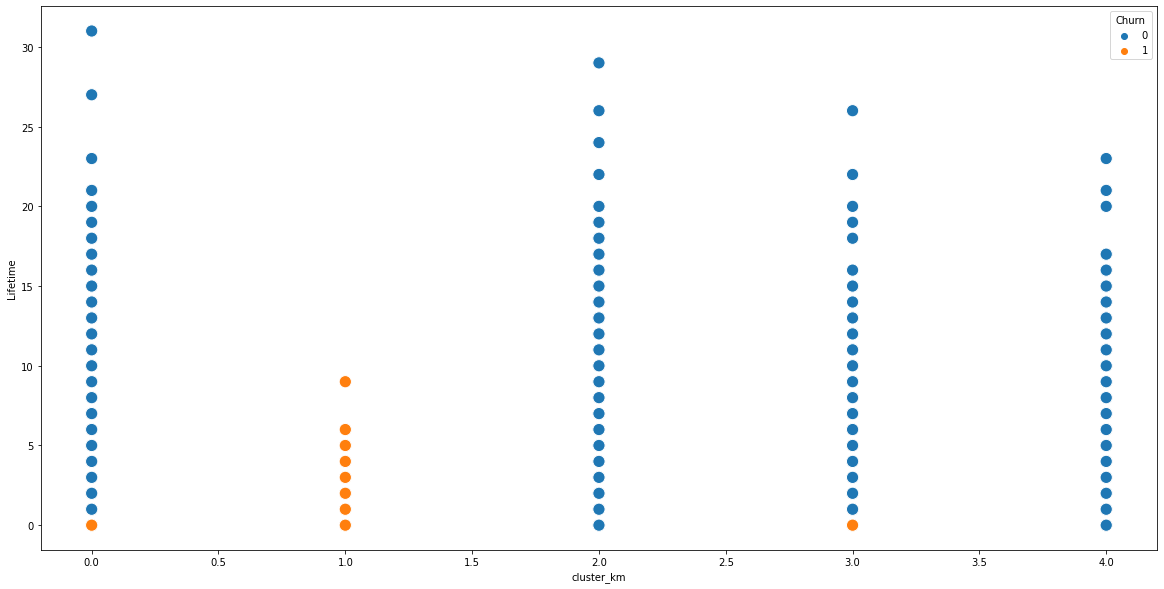

In [22]:
### membuat grafik distribusi fitur untuk setiap klasternya
plt.figure(figsize=(20,10))
sns.scatterplot(data=gym, x='cluster_km', y='Lifetime', hue='Churn', s=150)

<AxesSubplot:xlabel='cluster_km', ylabel='Avg_class_frequency_total'>

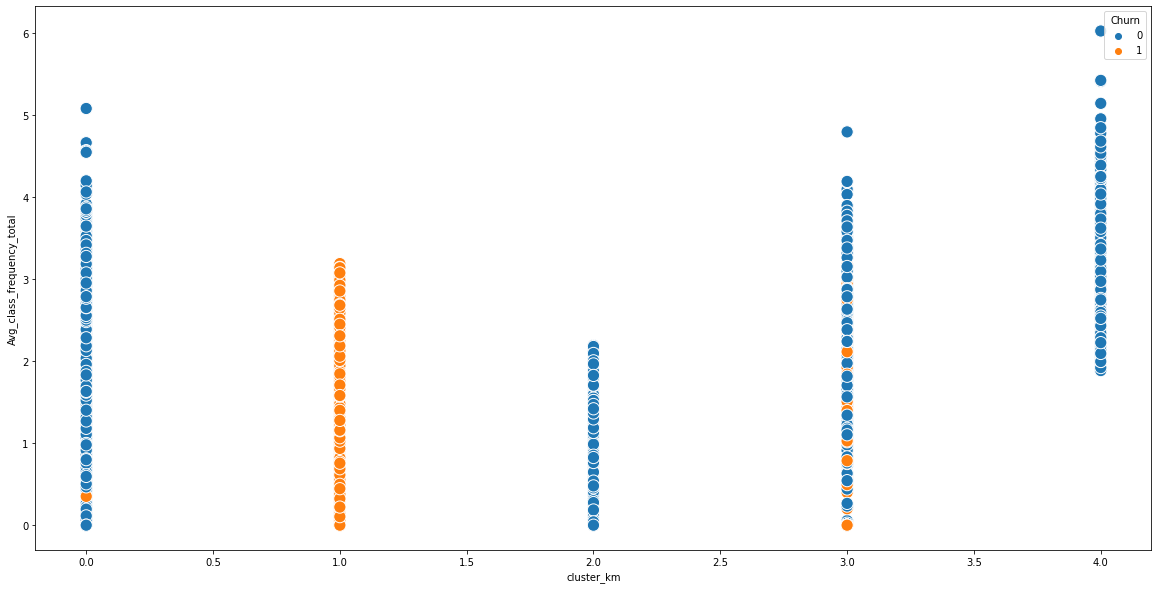

In [23]:
# membuat grafik distribusi fitur untuk setiap klasternya
plt.figure(figsize=(20,10))
sns.scatterplot(data=gym, x='cluster_km', y='Avg_class_frequency_total', hue='Churn', s=150)

<AxesSubplot:xlabel='cluster_km', ylabel='Avg_class_frequency_current_month'>

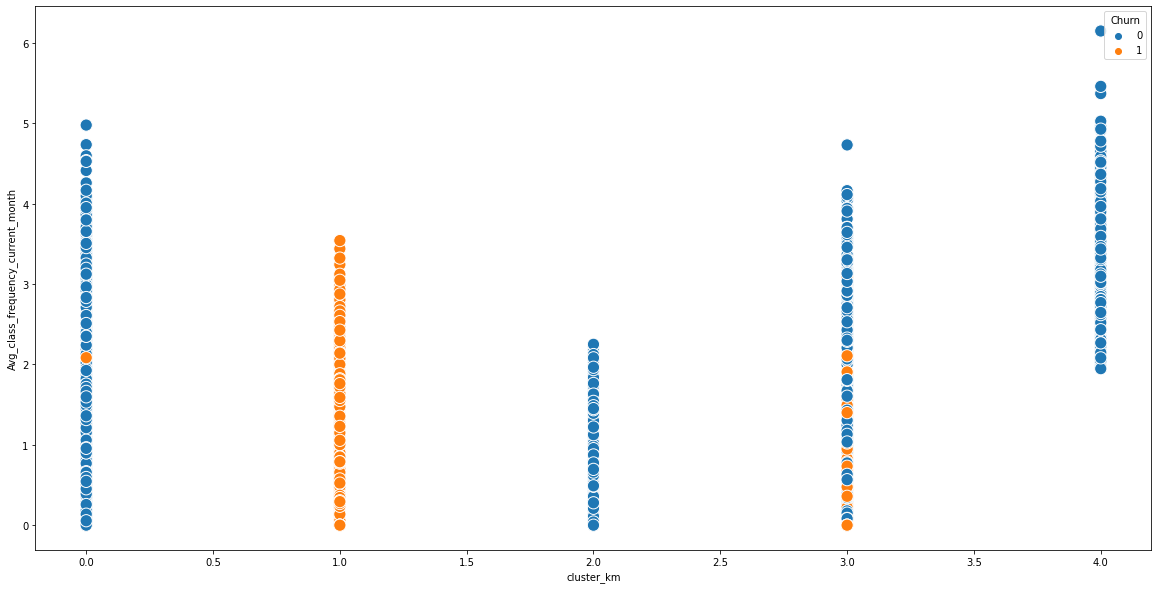

In [24]:
# membuat grafik distribusi fitur untuk setiap klasternya
plt.figure(figsize=(20,10))
sns.scatterplot(data=gym, x='cluster_km', y='Avg_class_frequency_current_month', hue='Churn', s=150)

Dari kelima grafik diatas, dapat kita lihat bahwa cluster ke-4 adalah yang paling banyak berhenti datang ke gym.

In [25]:
gym.groupby('cluster_km').sum()['Churn'] / gym.groupby('cluster_km').count()['Churn'] * 100

cluster_km
0     1.552795
1    99.787234
2     0.115607
3    26.370757
4     0.709220
Name: Churn, dtype: float64

Cluster ke-4 dan ke-2 memiliki churn rate tertinggi dibanding cluster lainnya. Cluster ke-4 bahkan mencapai hampir 100% churn rate.

## Kesimpulan dan Rekomendasi

Berikut beberapa kesimpulan yang didapat dari grafik distribusi fitur :
- Cluster ke-4 dan ke-2 memiliki churn rate tertinggi dibanding cluster lainnya. Cluster ke-4 bahkan mencapai hampir 100% churn rate.
- 'Avg_additional_charges_total' (jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.) pada semua cluster hampir berimbang jumlahnya.
- 'Lifetime' — waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran, mayoritas pelanggan pada klaster ke-4 mulai meninggalkan gym kurang dari setahun, bahkan banyak diantaranya yang pergi di beberapa bulan pertama. Hal yang sama juga terjadi saat kita lihat grafik distribusi 'Avg_class_frequency_total'.

Dari kesimpulan diatas, inilah beberapa rekomendasi yang ada :
- Karena banyak jumlah pelanggan yang memutuskan pergi bahkan di awal bulan, mungkin tempat gym dapat memberikan promo khusus awal bulan selama beberapa waktu tertentu (misalnya saja 3 hari atau seminggu)
- Menggunakan sistem booking, karena bisa saja terlalu banyak pelanggan yang datang berolahraga pada jam yang bersamaan, sehingga berolahraga menjadi kurang nyaman. Dengan sistem ini, pelanggan dapat berolahraga lebih nyaman karena tidak berebutan tempat/alat gym.
- Pemeliharaan tempat dan fasilitas gym. Dengan pemeliharaan yang teratur, fasilitas gym yang bekerja dengan baik tentunya dapat meningkatkan kepuasan pelanggan dalam menggunakannya.
- Menambahkan alat gym sesuai kebutuhan pelanggan. Tentunya kita tidak dapat memenuhi semua ekspetasi dan permintaan pelanggan, namun tidak ada salahnya untuk menambah jumlah atau variasi alat gym yang belum ada agar pelanggan dapat menggunakannya sesuai kebutuhan mereka.